# Notebook to check if the isaura processing has worked as intended

- plot hits of events
- display topology underneath

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tables as tb
from matplotlib import colors 

from typing          import Optional
from typing          import Union
from typing          import Callable

import sys,os,os.path
sys.path.append("/gluster/data/next/software/IC_311024/")
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
#sys.path.append("/home/e78368jw/Documents/NEXT_CODE/next_misc/")
os.environ['ICTDIR']='/gluster/data/next/software/IC_311024/'

from invisible_cities.io.dst_io           import load_dst, load_dsts, df_writer
from invisible_cities.io.hits_io          import hits_writer
from invisible_cities.core                import tbl_functions   as tbl
from invisible_cities.core.core_functions import in_range
from invisible_cities.cities.beersheba    import hitc_to_df_
from invisible_cities.io.hits_io          import hits_from_df
from invisible_cities.evm.nh5             import HitsTable
from invisible_cities.types.symbols       import NormStrategy
from invisible_cities.types.ic_types      import NoneType
from invisible_cities.reco.corrections    import read_maps, get_df_to_z_converter, apply_all_correction
from invisible_cities.evm.event_model     import HitCollection

from tqdm import tqdm

import functions_HE as func

%load_ext autoreload
%autoreload 2

# Defaults

In [2]:
RUN_NUMBER = 15107
TIMESTAMP  = 140425

In [8]:
# just the one file
folder_path = f'/gluster/data/next/files/TOPOLOGY_John/N100_data/15107/isaura/140425/ldc1/'
file = f'isaura_run_15107_0002_ldc1_140425.h5'

In [9]:
tdst = load_dst(folder_path + file, 'Tracking', 'Tracks')
hdst = load_dst(folder_path + file, 'DECO', 'Events')

In [10]:
display(tdst)
display(hdst)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,1528,0,0.594004,156.041847,227,1899,3,401.125,-118.675,1297.299124,...,1357.180019,441.554672,5.050544,1374.592910,0.174153,0.055230,0.000000,8.804348,8.990385,8.977373
1,1528,1,0.267438,83.002242,151,1449,3,256.125,268.825,-980.347281,...,-980.347281,277.645730,286.957575,-912.289807,0.134073,0.083124,0.000000,8.804348,8.990385,8.977373
2,1528,2,0.010321,0.000000,1,11,3,318.625,81.325,-1033.801644,...,-1033.801644,322.332914,84.112049,-1033.801644,0.010321,0.010321,0.010321,8.804348,8.990385,8.977373
3,1556,0,0.300951,43.054829,54,568,2,253.625,-36.175,1886.080978,...,1920.139900,264.998600,-24.680868,1886.080978,0.194735,0.151894,0.069226,7.857143,8.750000,8.490785
4,1556,1,0.117946,23.571429,13,150,2,261.125,-28.675,1928.829621,...,1928.829621,286.410330,-12.564130,1928.829621,0.117946,0.117946,0.117946,7.857143,8.750000,8.490785
5,1612,0,0.223346,26.373400,15,204,2,-86.375,88.825,277.098368,...,282.831197,-84.413040,102.455477,301.969925,0.213821,0.166726,0.157202,8.750000,7.500000,8.386823
6,1612,1,0.112246,22.639939,14,150,2,-86.375,81.325,243.262162,...,250.796795,-75.328008,99.143851,268.024129,0.112246,0.111938,0.111938,8.750000,7.500000,8.386823
7,1626,0,0.324977,48.719790,59,592,4,123.625,191.325,2439.515206,...,2446.299541,153.591883,200.814218,2481.261764,0.251750,0.107525,0.036820,8.921569,8.888889,8.924459
8,1626,1,0.087201,76.180872,39,310,4,6.125,-236.175,2472.754784,...,2472.754784,23.652059,-168.701564,2472.754784,0.054807,0.027830,0.000000,8.921569,8.888889,8.924459
9,1626,2,0.043063,12.595964,3,54,4,-278.875,-76.175,3199.824628,...,3210.948740,-277.642066,-65.592230,3199.824628,0.043063,0.043063,0.043063,8.921569,8.888889,8.924459


,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,1528,1.742935e+09,4,84.781767,100.170984,0,331.125,88.825,0.0,0.0,-1050.278463,0.000018,0.000018,-1.0,0.000018,-1,NaN
1,1528,1.742935e+09,4,84.781767,100.170984,0,331.125,91.325,0.0,0.0,-1050.278463,0.000026,0.000026,-1.0,0.000026,-1,NaN
2,1528,1.742935e+09,4,84.781767,100.170984,0,331.125,93.825,0.0,0.0,-1050.278463,0.000019,0.000019,-1.0,0.000019,-1,NaN
3,1528,1.742935e+09,4,84.781767,100.170984,0,333.625,88.825,0.0,0.0,-1050.278463,0.000047,0.000047,-1.0,0.000047,-1,NaN
4,1528,1.742935e+09,4,84.781767,100.170984,0,333.625,91.325,0.0,0.0,-1050.278463,0.000067,0.000067,-1.0,0.000067,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17467,1892,1.742935e+09,3,-51.560706,69.602231,0,-83.875,116.325,0.0,0.0,2197.053624,0.000131,0.000131,-1.0,0.000131,0,0.000131
17468,1892,1.742935e+09,3,-51.560706,69.602231,0,-83.875,118.825,0.0,0.0,2197.053624,0.000135,0.000135,-1.0,0.000135,0,0.000135
17469,1892,1.742935e+09,3,-51.560706,69.602231,0,-83.875,121.325,0.0,0.0,2197.053624,0.000140,0.000140,-1.0,0.000140,0,0.000140
17470,1892,1.742935e+09,3,-51.560706,69.602231,0,-83.875,123.825,0.0,0.0,2197.053624,0.000146,0.000146,-1.0,0.000146,0,0.000146


EVENT 1528
Total energy 0.87 MeV



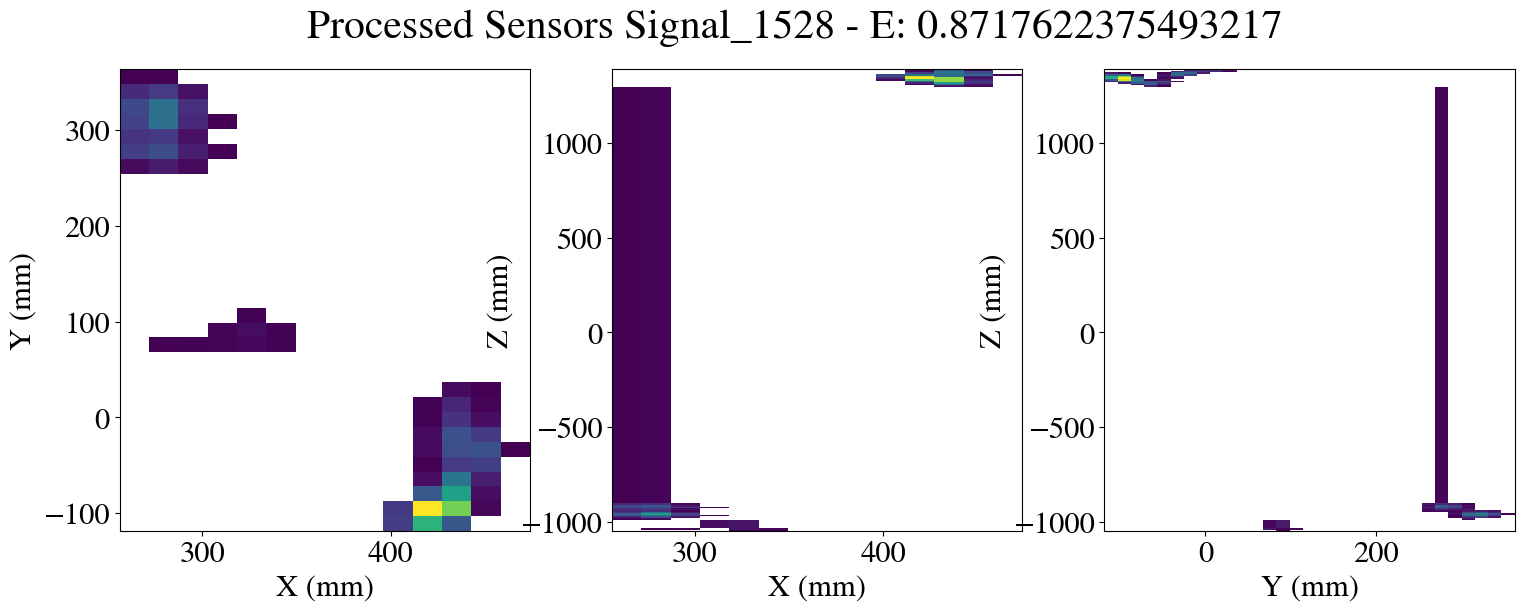

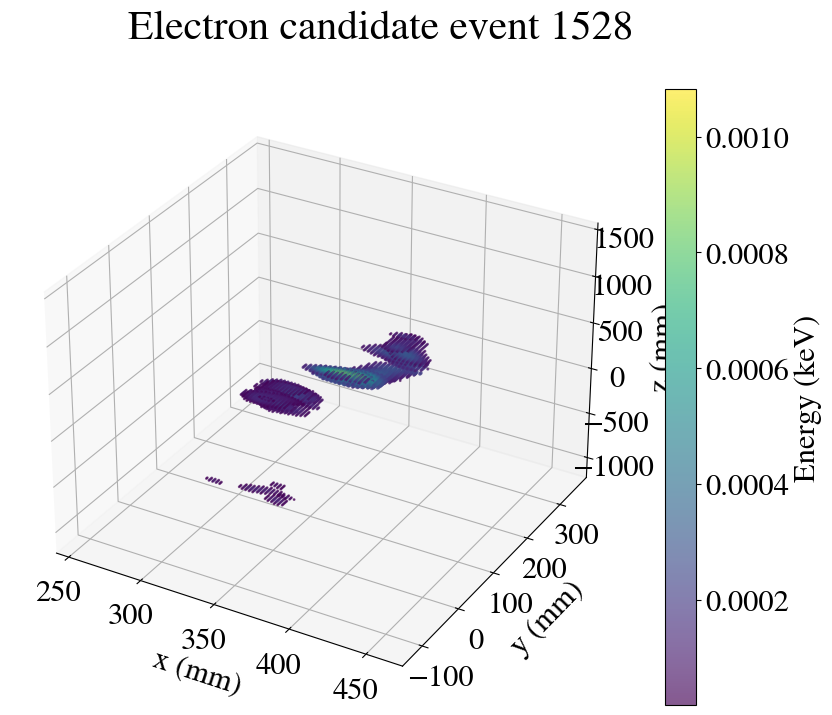

EVENT 1556
Total energy 0.42 MeV



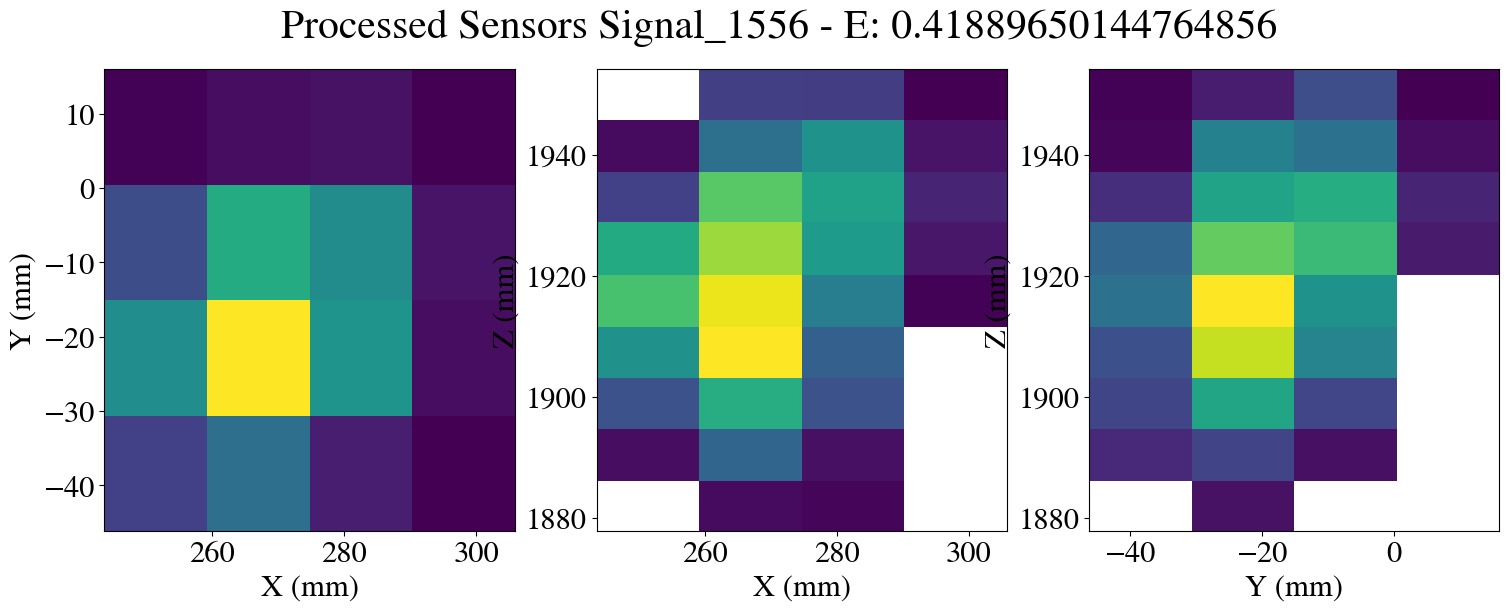

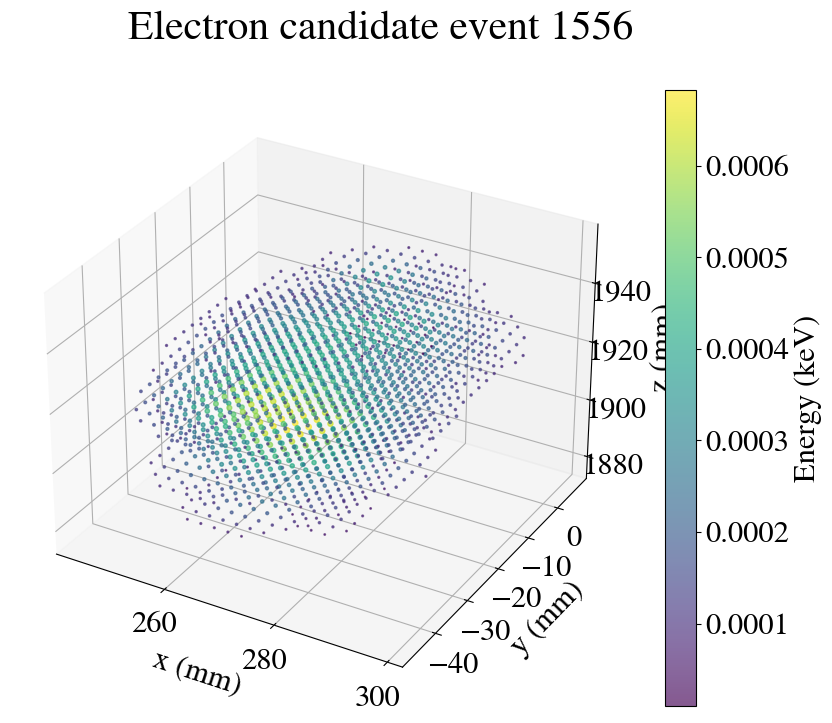

EVENT 1612
Total energy 0.34 MeV



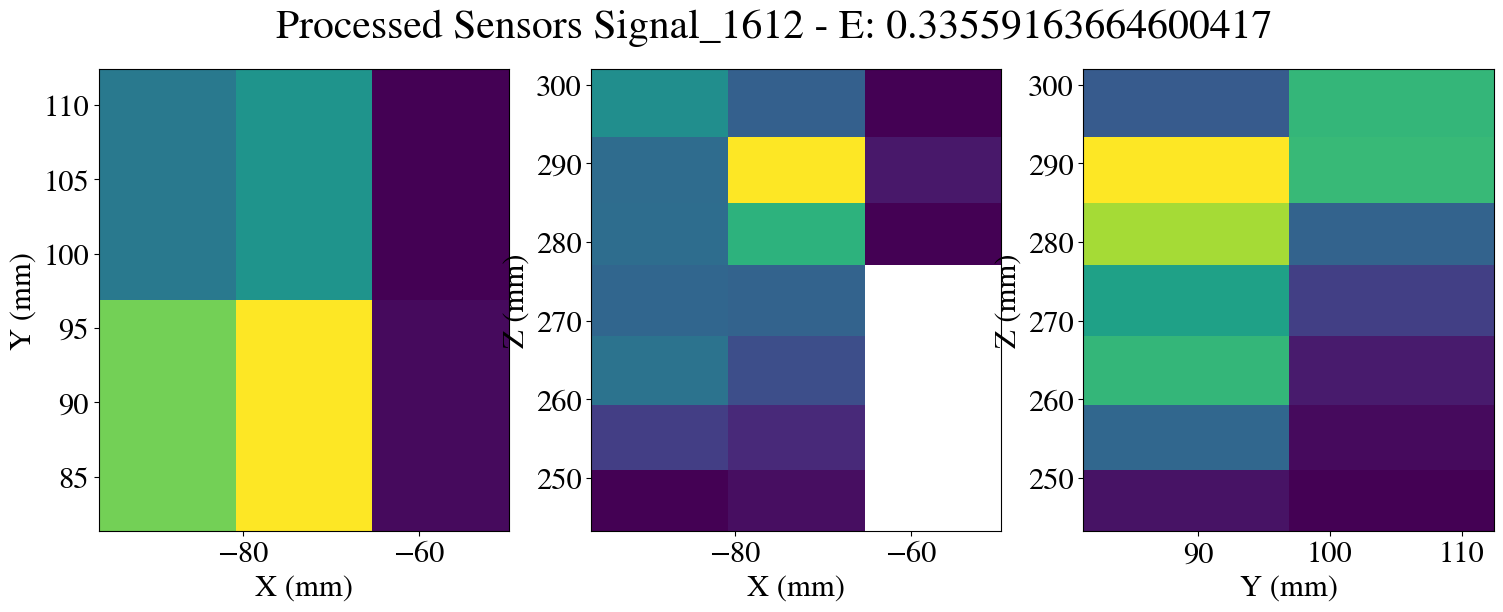

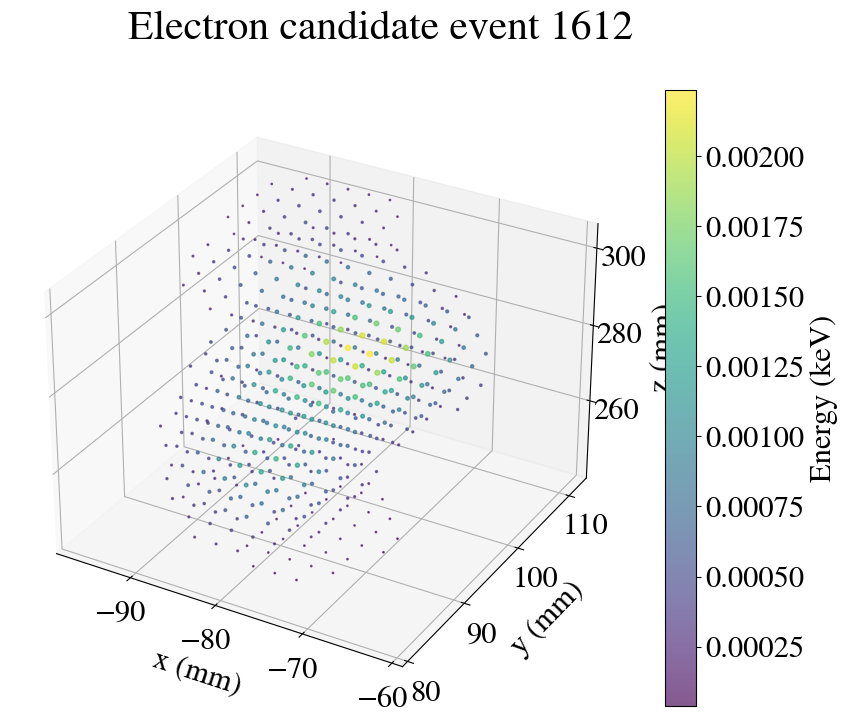

EVENT 1626
Total energy 0.48 MeV



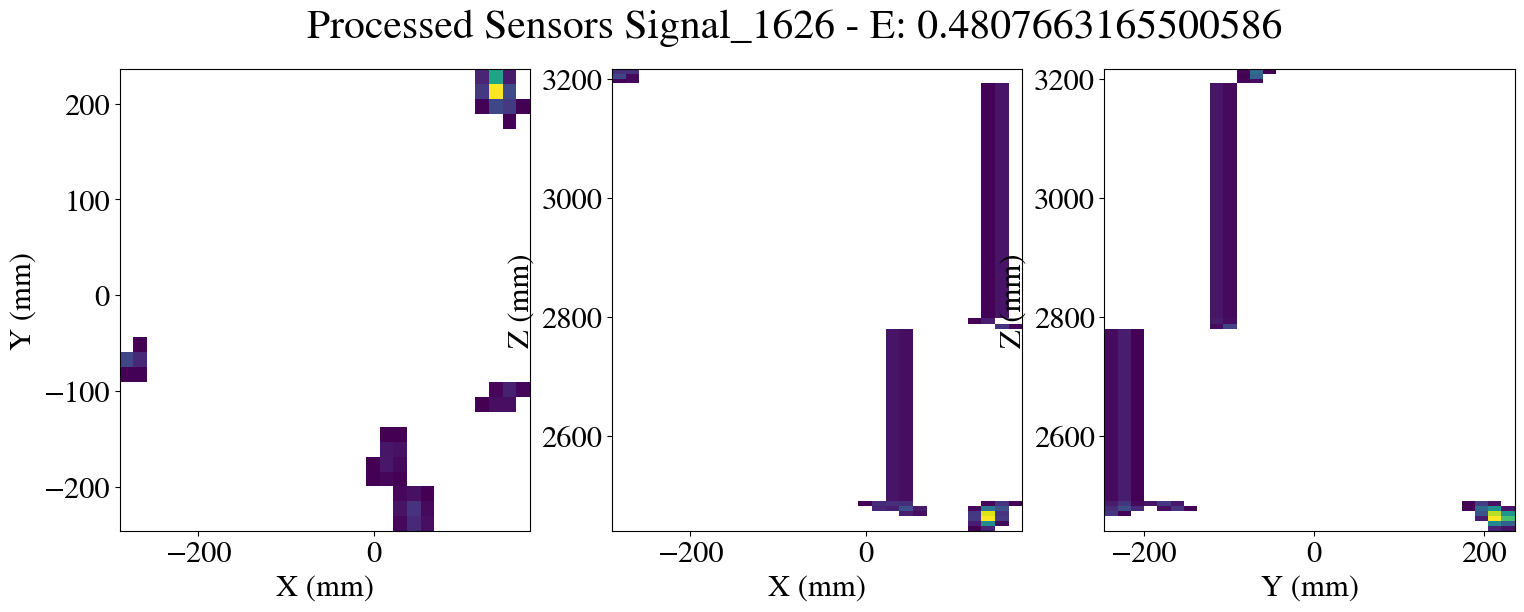

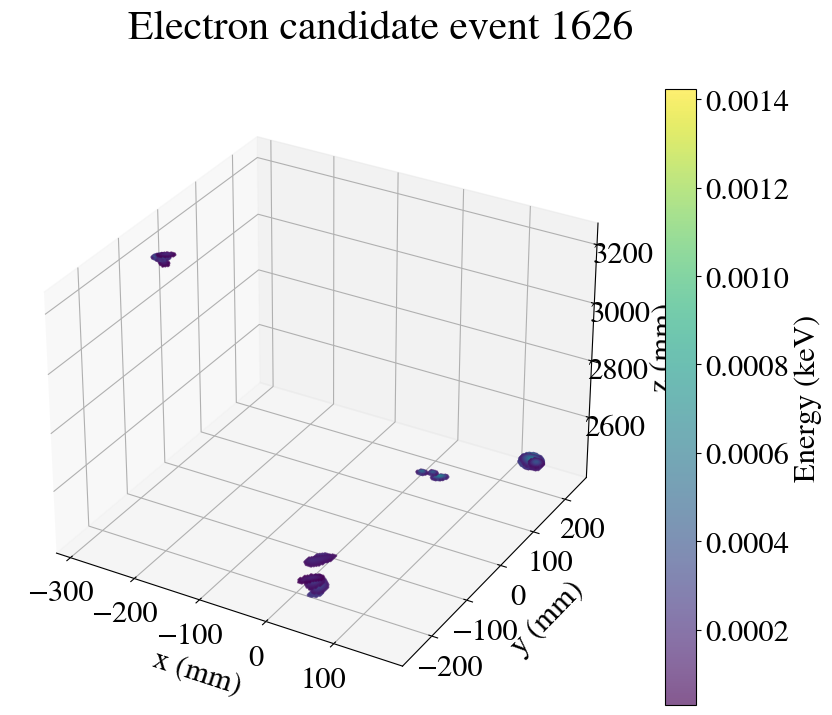

EVENT 1794
Total energy 0.61 MeV



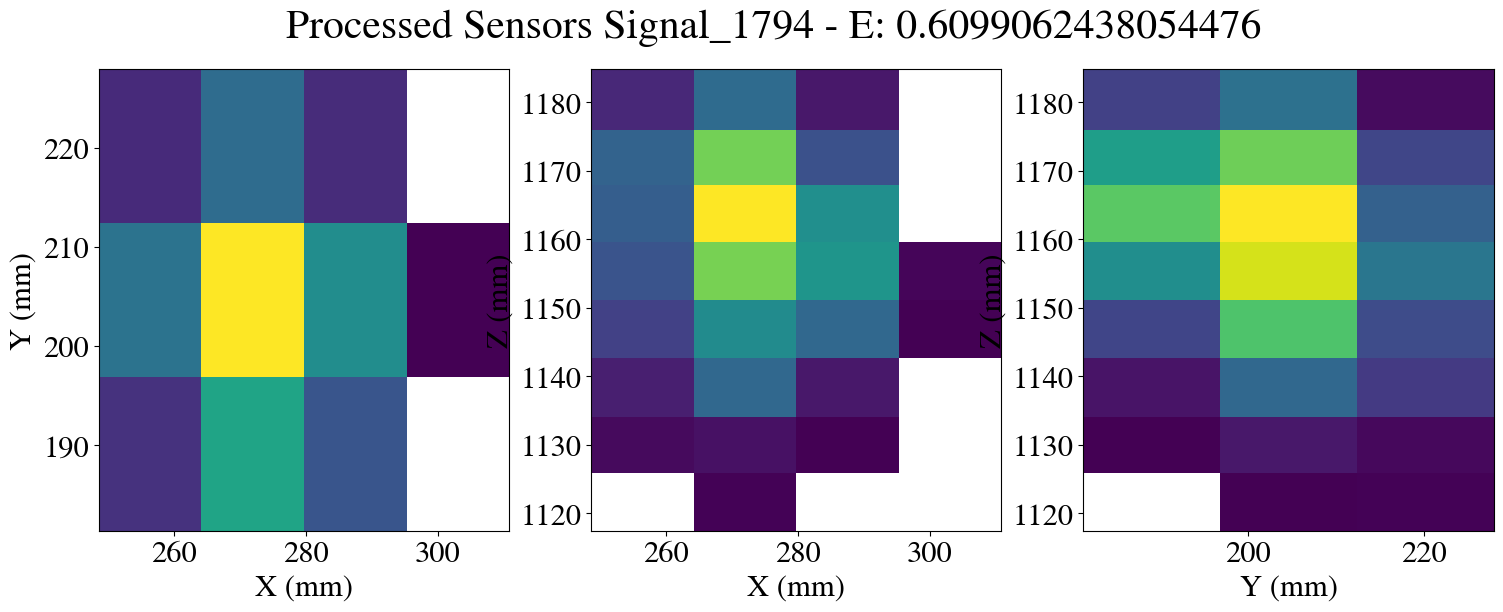

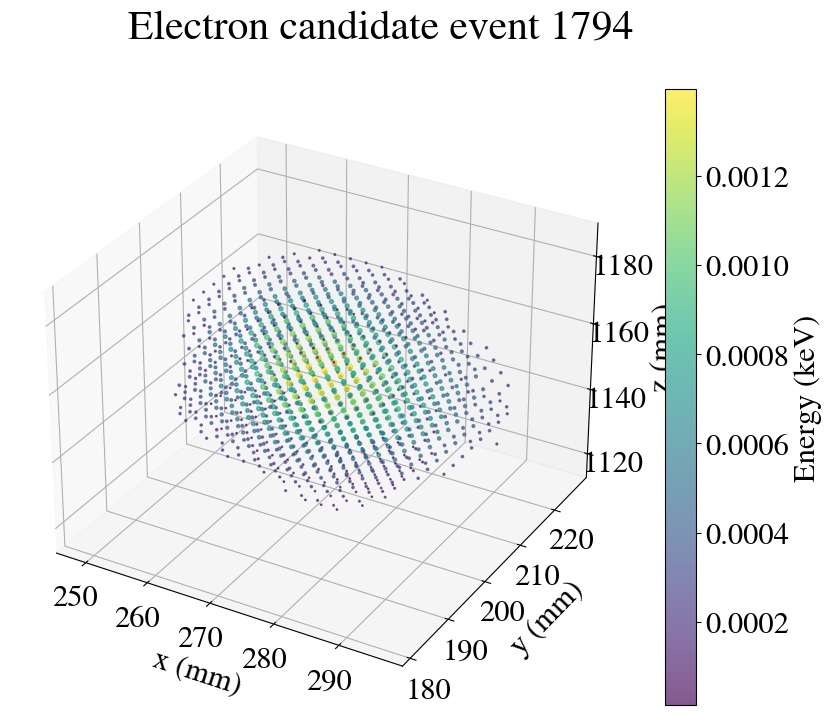

EVENT 1864
Total energy 0.74 MeV



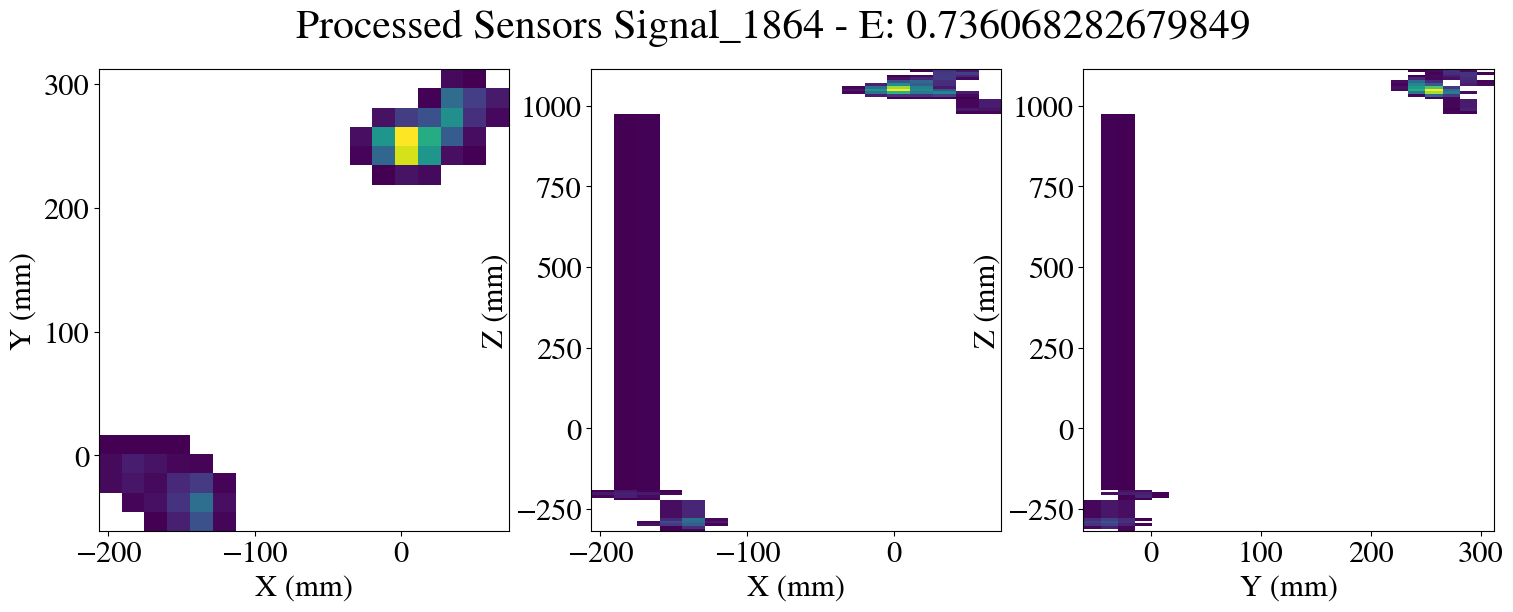

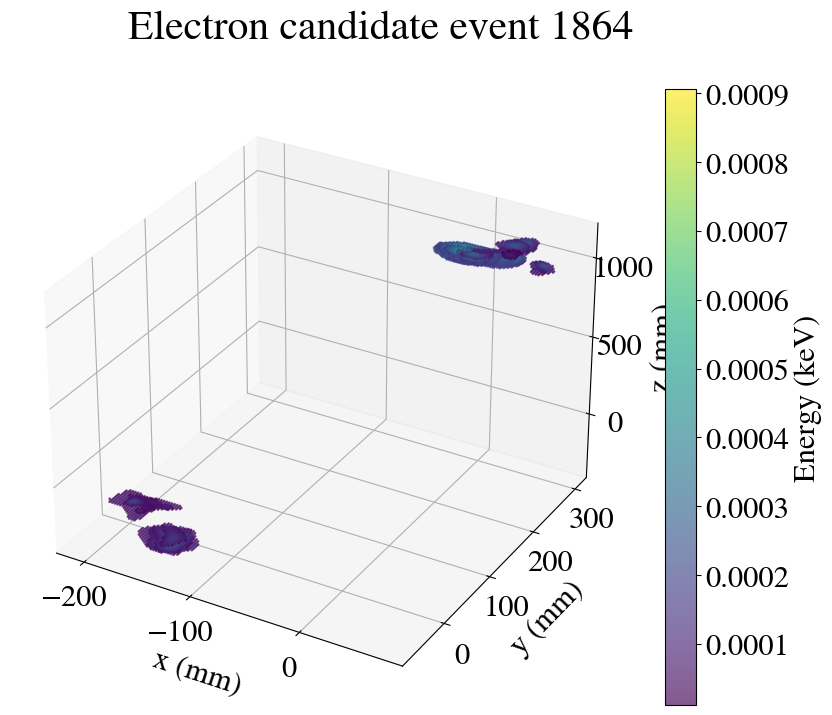

EVENT 1892
Total energy 0.60 MeV



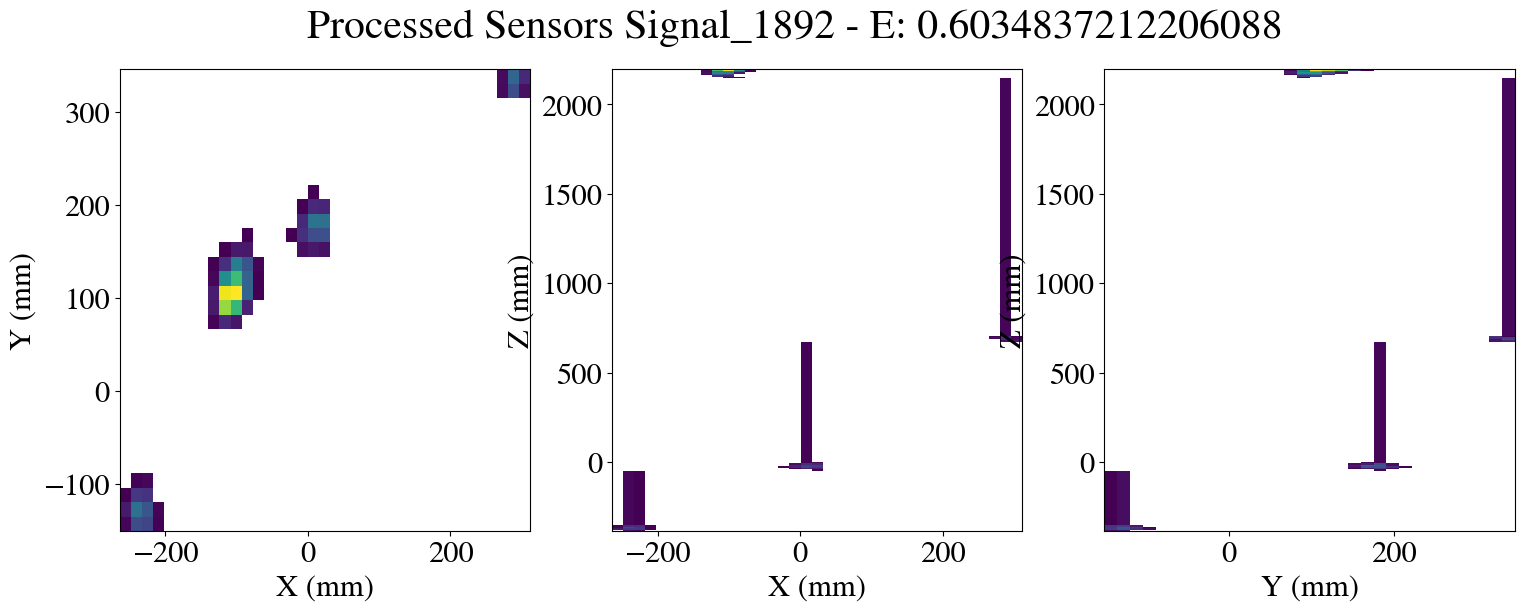

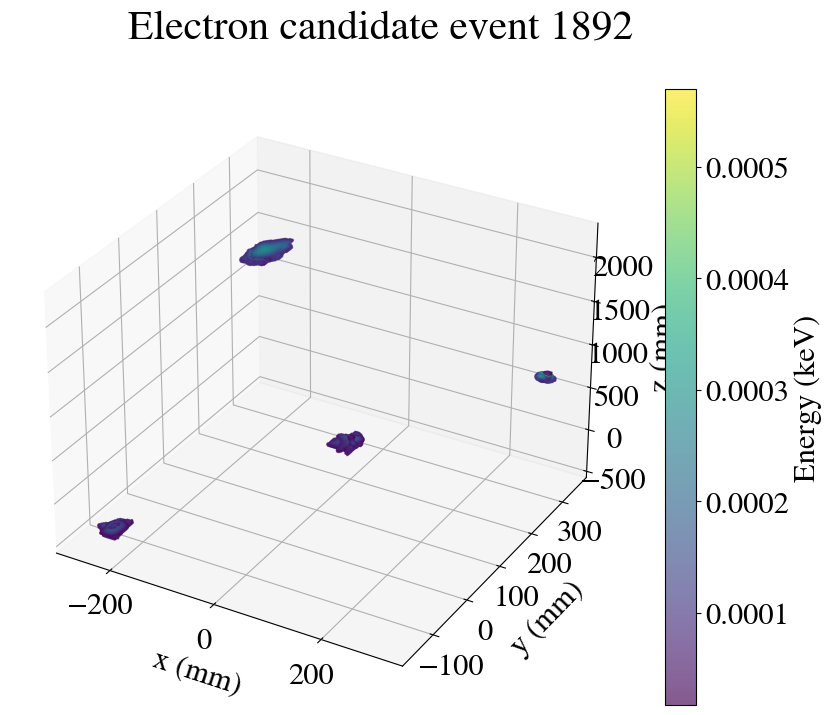

In [11]:
stopper = 20
for i, ev in enumerate(hdst.event.unique()):
    func.plotter(hdst, ev, deconv = True, cut_n_drop = False)
    func.plotter_3d(hdst, ev, cut_n_drop = False)
    if i > stopper:
        break